In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection, preprocessing
sns.set()

In [2]:
from sklearn import metrics
from sklearn.metrics.cluster import adjusted_rand_score
import mpl_toolkits.mplot3d  # noqa: F401
from sklearn.cluster import KMeans, MiniBatchKMeans

# Кластеризация данных

## Разведочный анализ и предобработка данных

Подробно о датасете

https://data-flair.training/blogs/r-data-science-project-customer-segmentation/

In [3]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [40]:
Mall_Customers = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Mall_Customers.csv')

In [5]:
Mall_Customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
Mall_Customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
def obj_in_int(df):
  for column in df:
    if df[column].dtype == 'O':
      df.loc[:, 'Ind_' + column] = pd.factorize(df[column])[0]

In [41]:
dataset = Mall_Customers.copy()
obj_in_int(dataset)
dataset = dataset.drop(['Gender', 'CustomerID'], axis=1)
dataset.describe()

,Age,Annual Income (k$),Spending Score (1-100),Ind_Gender
count,200.000000,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000,0.560000
std,13.969007,26.264721,25.823522,0.497633
min,18.000000,15.000000,1.000000,0.000000
25%,28.750000,41.500000,34.750000,0.000000
50%,36.000000,61.500000,50.000000,1.000000
75%,49.000000,78.000000,73.000000,1.000000
max,70.000000,137.000000,99.000000,1.000000


<Axes: xlabel='Gender', ylabel='count'>

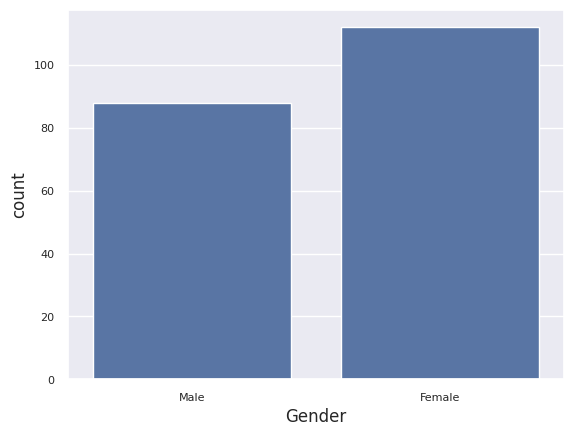

In [160]:
sns.countplot(x=Mall_Customers['Gender'])

<Axes: >

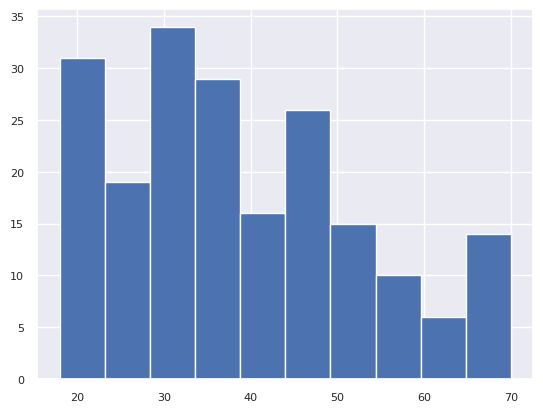

In [161]:
dataset.Age.hist()

<Axes: >

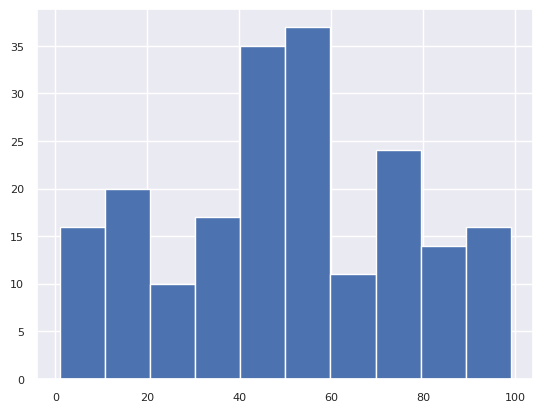

In [163]:
dataset['Spending Score (1-100)'].hist()

<Axes: >

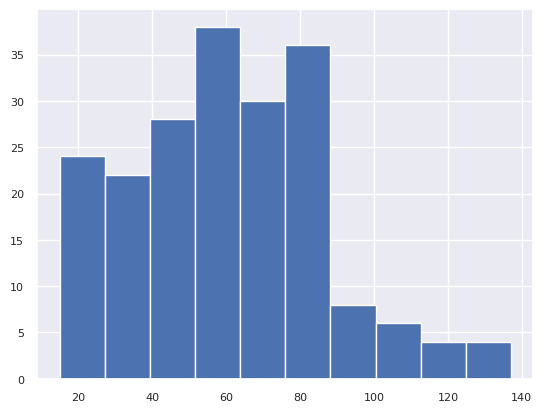

In [164]:
dataset['Annual Income (k$)'].hist()

## Распространенные алгоритмы кластеризации

### K-Means

In [130]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Ind_Gender']
X = dataset

#### Метрики

In [168]:
# best_metric = [0, 10000]

silhouette_score_values = []
# adjusted_rand_score_values = []

n_clusters = np.arange(2, 10)
for n in n_clusters:

    clusterer = KMeans(n_clusters=n, max_iter=10, n_init=10)
    y_pred = clusterer.fit_predict(X)

    score1 = metrics.silhouette_score(X, y_pred)
    silhouette_score_values.append(score1)

    # Мы не знаем наши классы (Зачем тогда кластеризация, если и так знаем про кластеры)
    # score2 = metrics.adjusted_rand_score(y, y_pred)
    # adjusted_rand_score_values.append(score2)


    # if score1 < best_metric[1] and score2 > best_metric[2]:
      # best_metric[0] = n
      # best_metric[1] = score1
      # best_metric[2] = score2

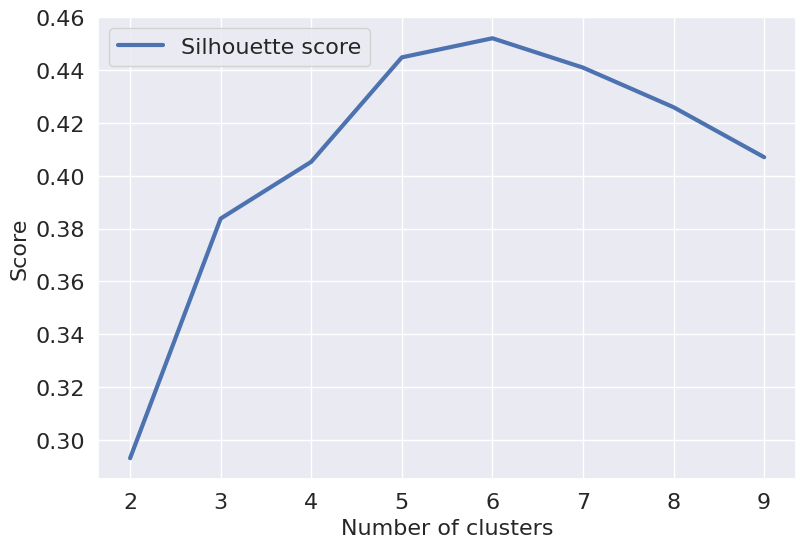

In [169]:
plt.figure(figsize=(9, 6))
plt.plot(n_clusters, silhouette_score_values, linewidth=3, label='Silhouette score')
# plt.plot(n_clusters, adjusted_rand_score_values, linewidth=3, label='Adjusted rand score')
plt.xlabel('Number of clusters', size=16)
plt.ylabel('Score', size=16)
plt.xticks(n_clusters, size=16)
plt.yticks(size=16)
plt.legend(loc='best', fontsize=16)

plt.show()

For n_clusters = 2 The average silhouette_score is : 0.31415818167942094
For n_clusters = 4 The average silhouette_score is : 0.39219951374758283
For n_clusters = 6 The average silhouette_score is : 0.45205475380756527
For n_clusters = 8 The average silhouette_score is : 0.39630296300612033


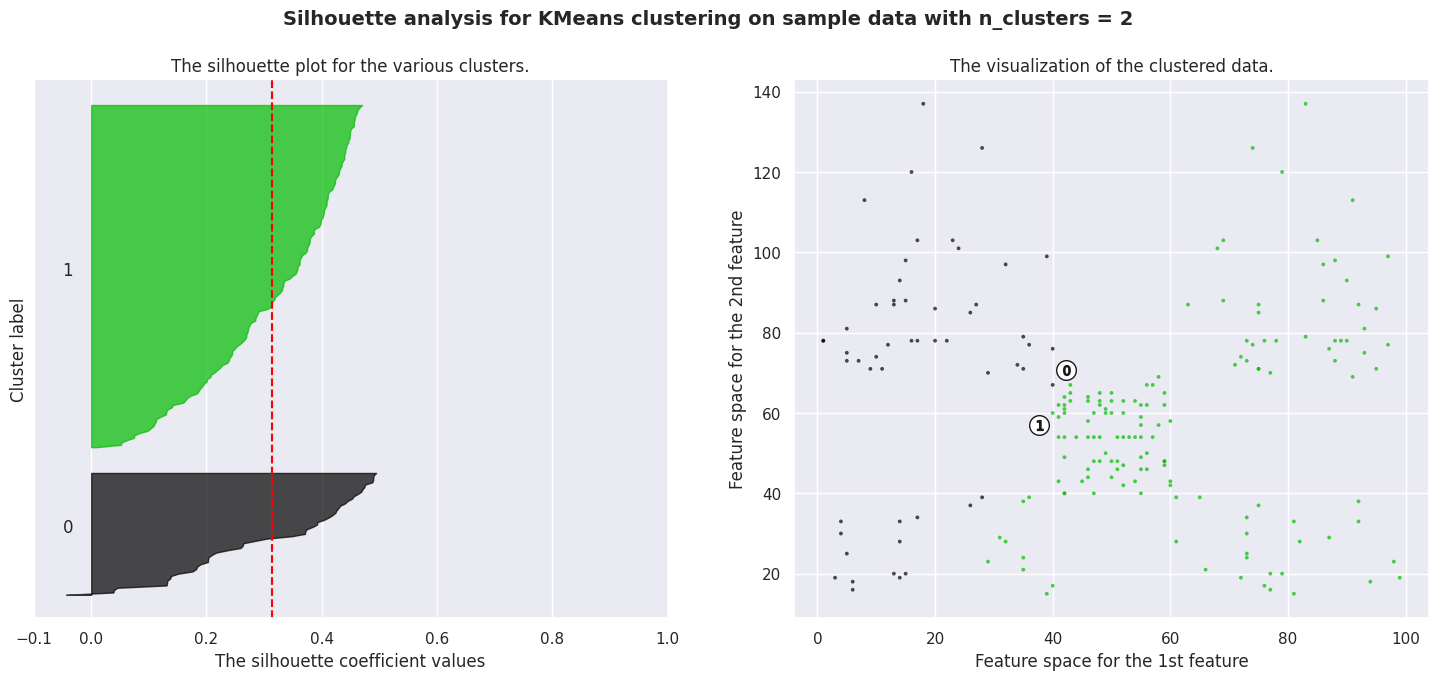

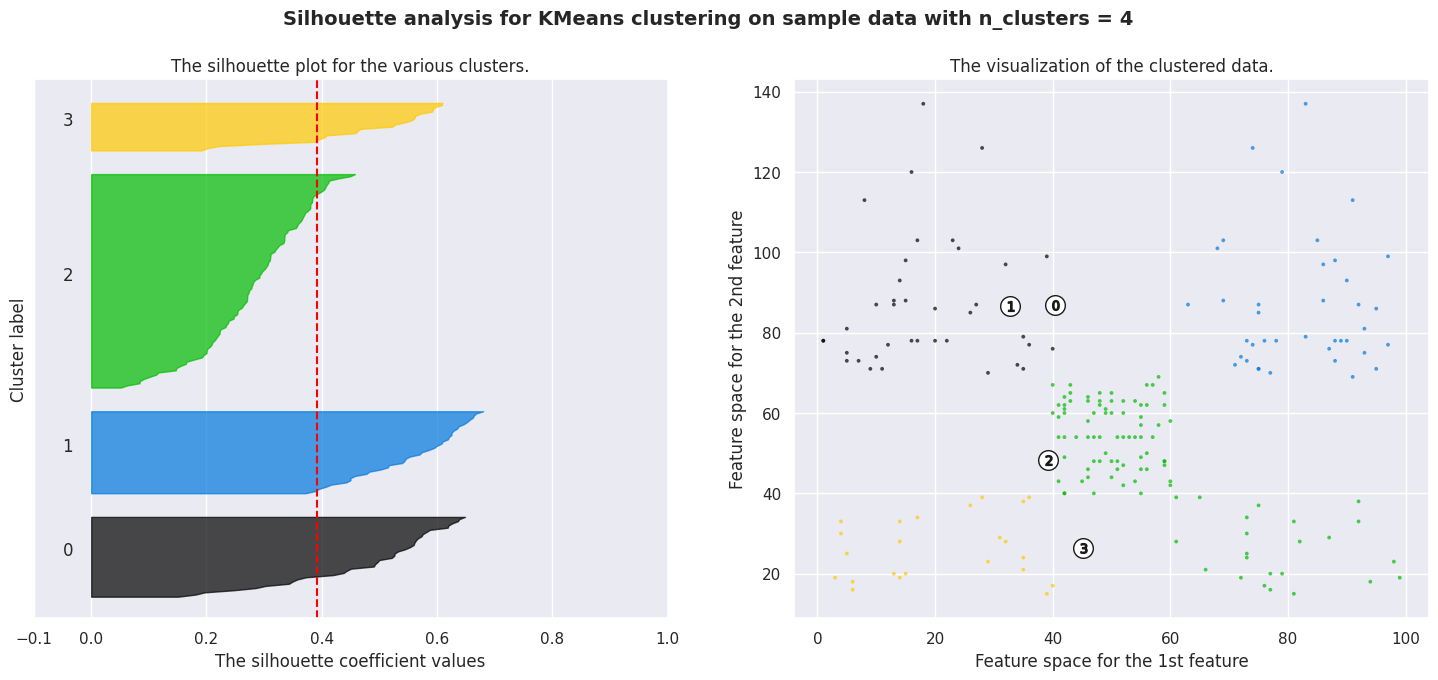

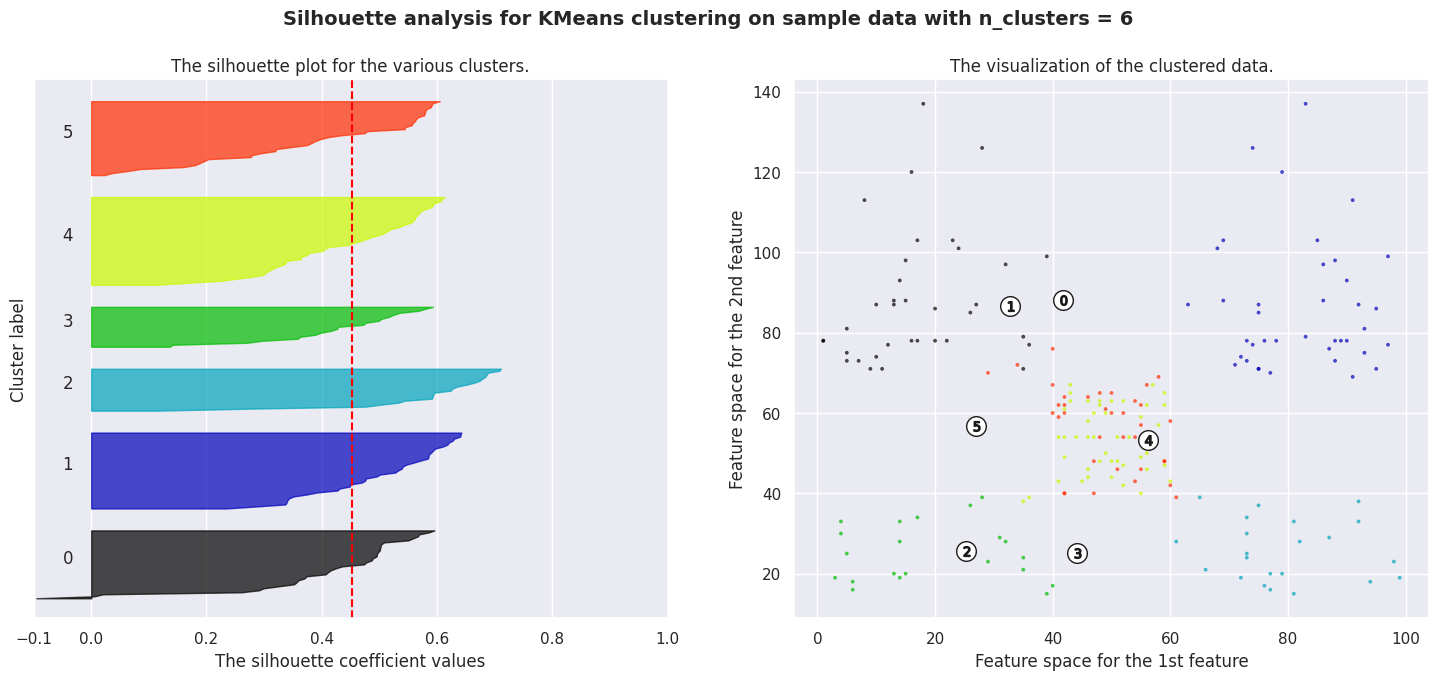

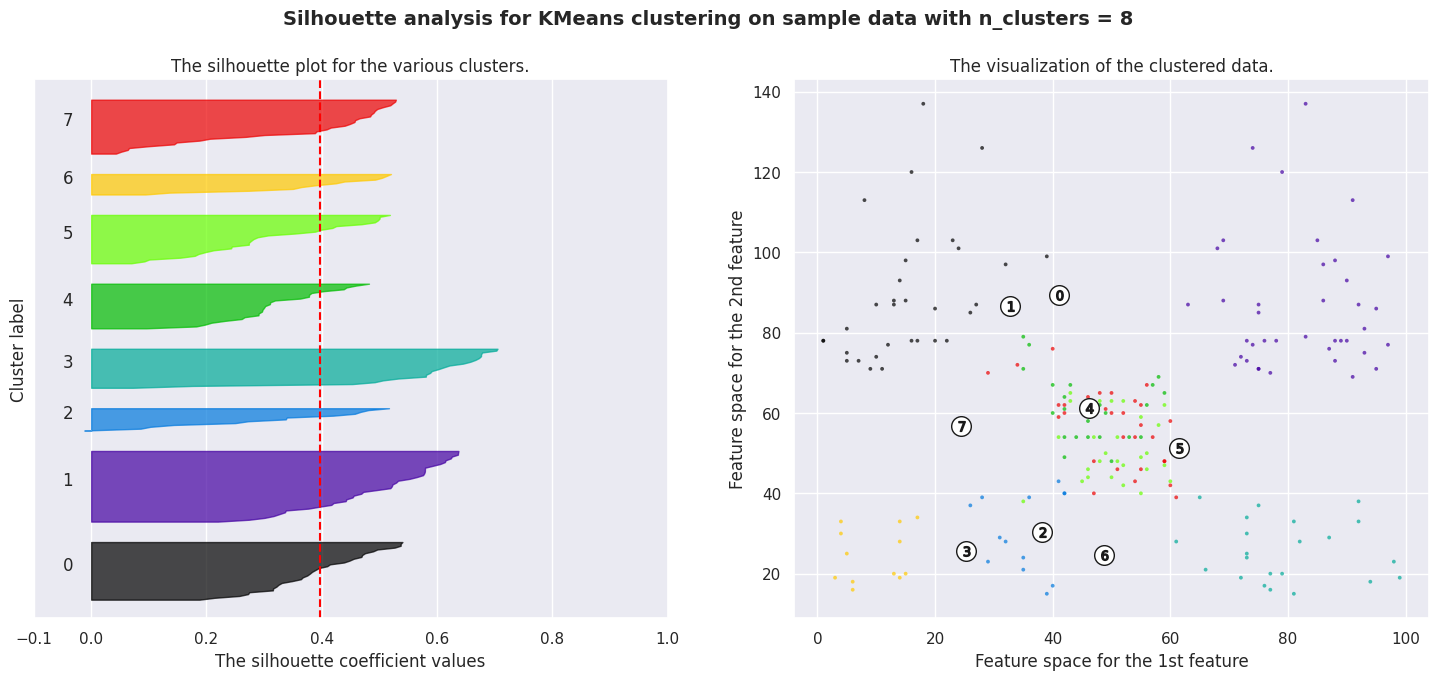

In [155]:
import matplotlib.cm as cm

from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = [2, 4, 6, 8]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X['Spending Score (1-100)'], X['Annual Income (k$)'], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

#### Визуализация кластеров

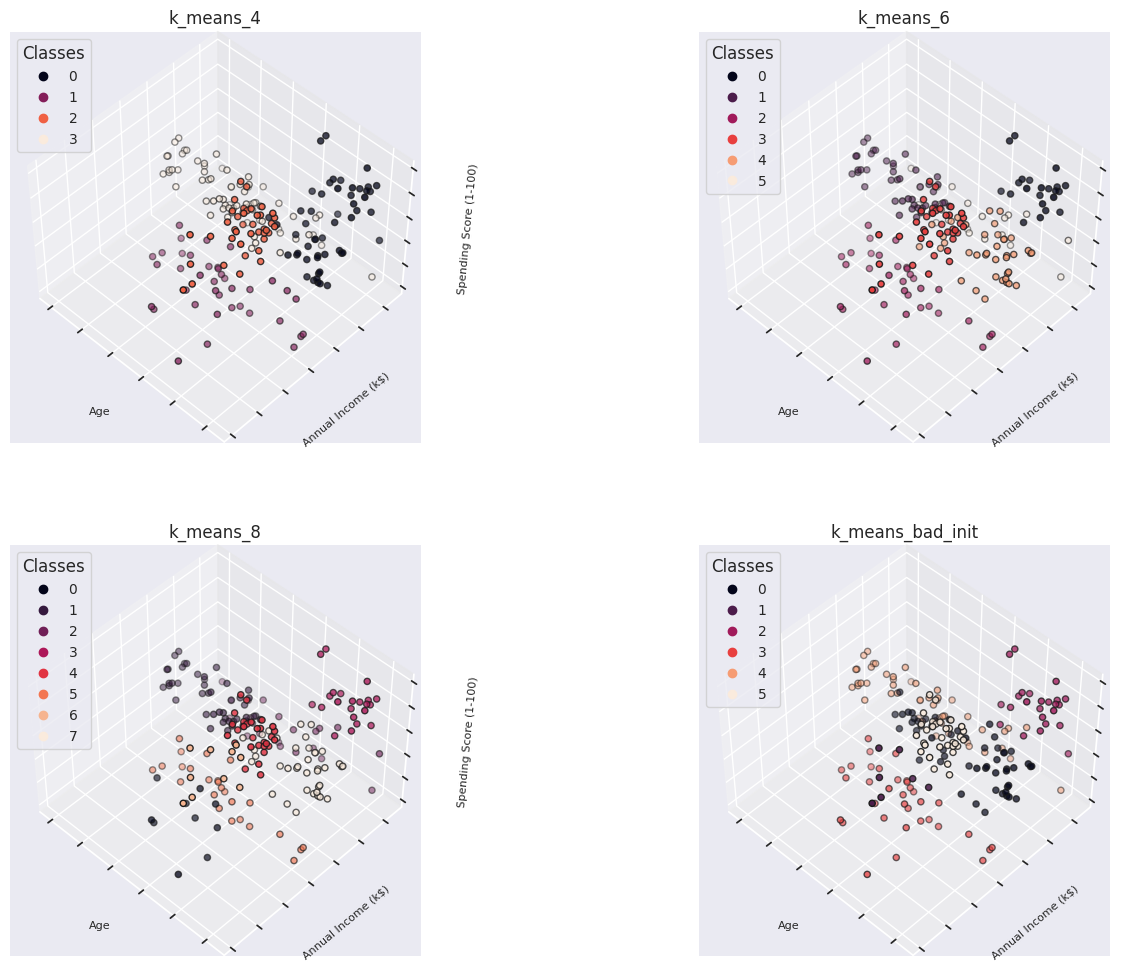

In [90]:
estimators = [
    ("k_means_4", KMeans(n_clusters=4)),
    ("k_means_6", KMeans(n_clusters=6)),
    ("k_means_8", KMeans(n_clusters=8)),
    ("k_means_bad_init", KMeans(n_clusters=6, n_init=1, init="random")),
]

fig = plt.figure(figsize=(16, 12))
for idx, (name, est) in enumerate(estimators):
    ax = fig.add_subplot(2, 2, idx + 1, projection="3d", elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    scatter = ax.scatter(X[columns[0]], X[columns[1]], X[columns[2]], c=labels.astype(float), edgecolor="k")

    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    ax.set_xlabel(columns[0], fontsize=8)
    ax.set_ylabel(columns[1], fontsize=8)
    ax.set_zlabel(columns[2], fontsize=8)
    ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="Classes", fontsize=10)
    ax.set_title(name)

plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.show()

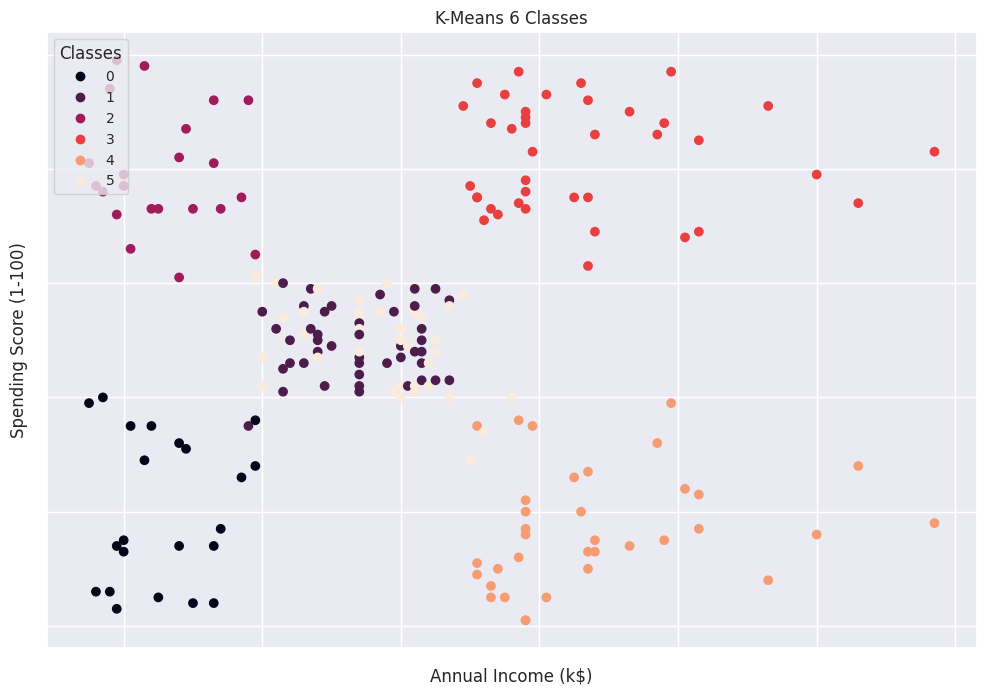

In [152]:
fig = plt.figure(figsize=(12, 8))

est = KMeans(n_clusters=6)
est.fit(X)
labels = est.labels_
ax = fig.add_subplot()
ax.scatter(X[columns[1]], X[columns[2]], c=0.5*labels)

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.set_xlabel(columns[1], fontsize=12)
ax.set_ylabel(columns[2], fontsize=12)
ax.legend(*scatter.legend_elements(),
          loc="upper left", title="Classes", fontsize=10)
ax.set_title("K-Means 6 Classes")
plt.show()

Из приведенной выше визуализации мы видим, что существует распределение 6 кластеров следующим образом:

Кластер 1 и 5 – Эти кластеры представляют собой customer_data со средним доходом, а также средними годовыми расходами на зарплату.

Кластер 3 – Этот кластер представляет собой customer_data с высоким годовым доходом, а также высокими годовыми расходами.

Кластер 0 – Этот кластер обозначает customer_data с низким годовым доходом, а также низкими годовыми расходами на доход.

Кластер 4 – Этот кластер обозначает высокий годовой доход и низкие годовые расходы.

Кластер 2 – Этот кластер представляет собой низкий годовой доход, но его высокие годовые расходы.

### Иерархическая кластеризация

In [31]:
from scipy.cluster.hierarchy import linkage, dendrogram

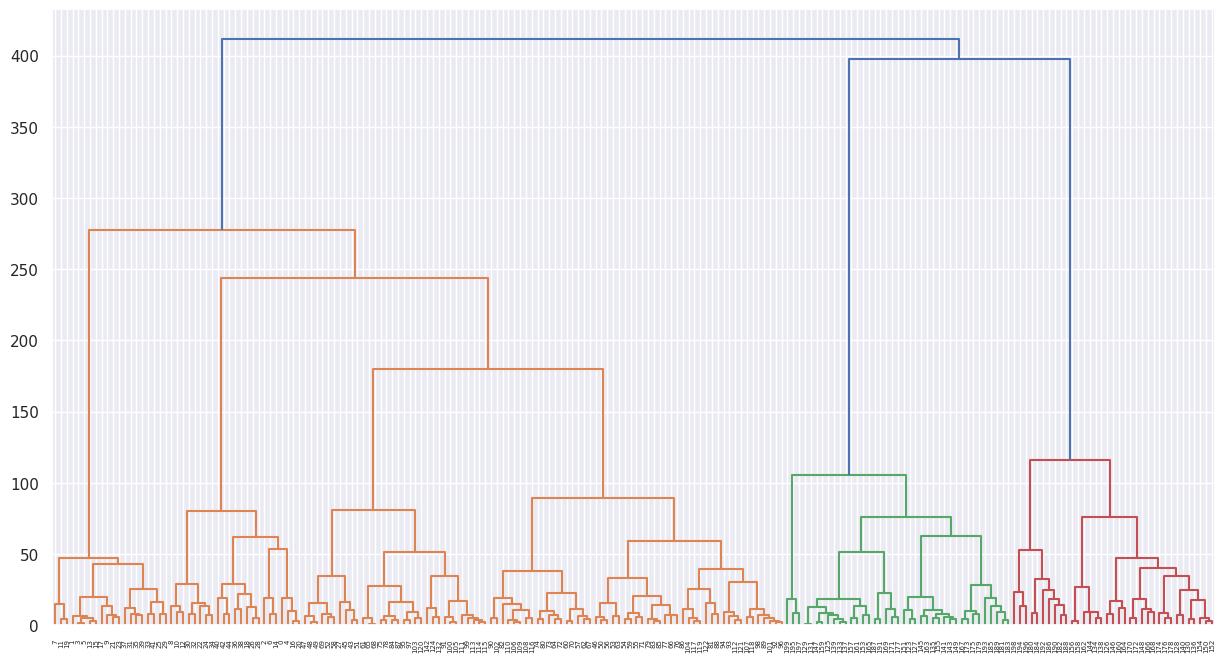

In [51]:
samples = dataset.values

# Реализация иерархической кластеризации при помощи функции linkage
mergings = linkage(samples, method='ward')
# попробуйте с другими методами
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

plt.figure(figsize=(15, 8))
# Строим дендрограмму, указав параметры удобные для отображения
dendrogram(mergings,
           leaf_rotation=90,
           leaf_font_size=5,
           )

plt.show()

### Пространственная кластеризация приложений с шумом на основе плотности

In [59]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

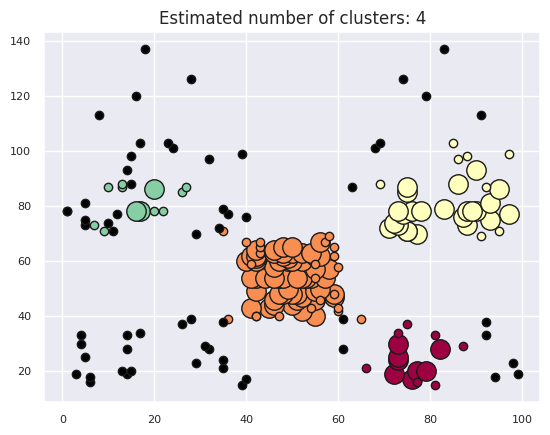

In [206]:
db = DBSCAN(eps=12.0, min_samples=8).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy['Spending Score (1-100)'], xy['Annual Income (k$)'], "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy['Spending Score (1-100)'], xy['Annual Income (k$)'],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

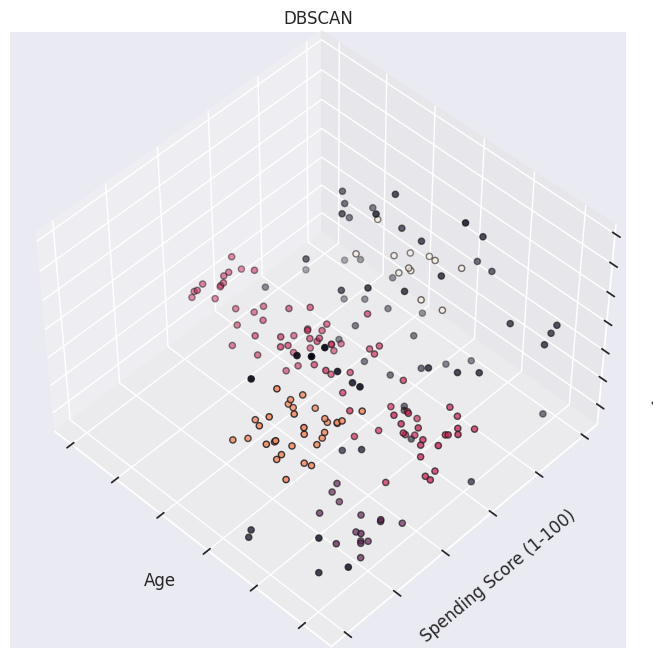

In [208]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection="3d", elev=48, azim=134)

ax.scatter(X["Age"], X['Spending Score (1-100)'], X['Annual Income (k$)'], c=labels.astype(float), edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("Age")
ax.set_ylabel("Spending Score (1-100)")
ax.set_zlabel("Annual Income (k$)")
ax.set_title("DBSCAN")

plt.show()

In [207]:
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f" % sc)
# ari = adjusted_rand_score(y, labels)
# print("Adjusted Rand Index: %0.2f" % ari)

Silhouette Coefficient:0.20
